In [78]:
#This is a supermarket mall data and through membership cards, we have some basic data about customers like Customer ID, age, gender, annual income and spending score. Spending Score is something assigned to the customer based on defined parameters like customer behavior and purchasing data.
#Forming clusters of customers by applying K-means clustering.

In [79]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [80]:
data=pd.read_csv(r"C:\Users\shamzkha\Documents\Mall_Customers.csv")

In [81]:
data.shape

(200, 5)

In [82]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [83]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
data.drop(columns=["CustomerID"], inplace=True)

In [85]:
data=data.rename(columns={"Annual Income (k$)":"Annual_Income_dollar"})

In [86]:
data=data.rename(columns={"Spending Score (1-100)":"Spending_Score_1to100"})

# Converting categorical column to numerical

In [88]:
data.Genre=le.fit_transform(data.Genre)

In [89]:
#data.head()

# K-Means Clustering

In [91]:
data_kmeans=KMeans(n_clusters=4)

In [92]:
data_kmeans.fit(data)

KMeans(n_clusters=4)

In [93]:
data_kmeans.cluster_centers_ #centroids of the cluster

array([[ 0.4057971 , 52.05797101, 46.42028986, 39.88405797],
       [ 0.45      , 32.875     , 86.1       , 81.525     ],
       [ 0.41509434, 25.05660377, 40.73584906, 62.62264151],
       [ 0.52631579, 40.39473684, 87.        , 18.63157895]])

In [94]:
l1=list(data_kmeans.labels_)

In [95]:
len(l1)

200

In [96]:
data_kmeans.fit(data).score(data) #SSD

-110045.9229754151

In [97]:
nc=range(2,15)
kmeans=[KMeans(n_clusters=i)for i in nc]
kmeans
score=[kmeans[i].fit(data).score(data)for i in range(len(kmeans))]
print(score)                                                               #elbow method

[-221222.99561403508, -157981.67447892812, -104414.67534220166, -79325.58616149588, -58348.64136331505, -51179.49834250717, -45498.30101905785, -47390.01188811188, -39739.26801629743, -36355.809358574304, -32198.128391053397, -32361.76592712843, -28200.541394406733]


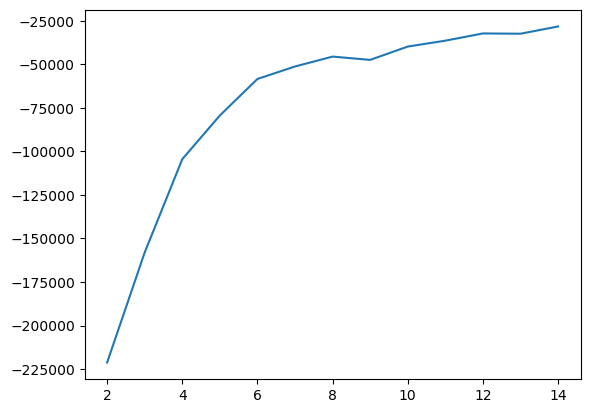

In [98]:
plt.plot(nc,score) #elbow curve but upside down because distance is in negative.distance cannot be negative

In [99]:
score1=np.absolute(score) #making it in positive
score1

array([221222.99561404, 157981.67447893, 104414.6753422 ,  79325.5861615 ,
        58348.64136332,  51179.49834251,  45498.30101906,  47390.01188811,
        39739.2680163 ,  36355.80935857,  32198.12839105,  32361.76592713,
        28200.54139441])

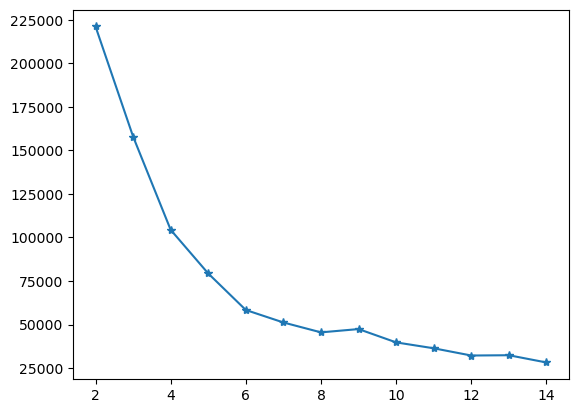

In [100]:
plt.plot(nc,score1,marker="*")

In [101]:
cluster=pd.concat([data,pd.Series(data_kmeans.labels_)],axis=1) #to check which observation is falling under which cluster
cluster.head(180)

,Genre,Age,Annual_Income_dollar,Spending_Score_1to100,0
0,1,19,15,39,3
1,1,21,15,81,0
2,0,20,16,6,3
3,0,23,16,77,0
4,0,31,17,40,3
...,...,...,...,...,...
175,0,30,88,86,2
176,1,58,88,15,1
177,1,27,88,69,2
178,1,59,93,14,1


In [102]:
cluster.rename(columns={cluster.columns[4]:"Cluster_number"},inplace=True)
cluster

,Genre,Age,Annual_Income_dollar,Spending_Score_1to100,Cluster_number
0,1,19,15,39,3
1,1,21,15,81,0
2,0,20,16,6,3
3,0,23,16,77,0
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


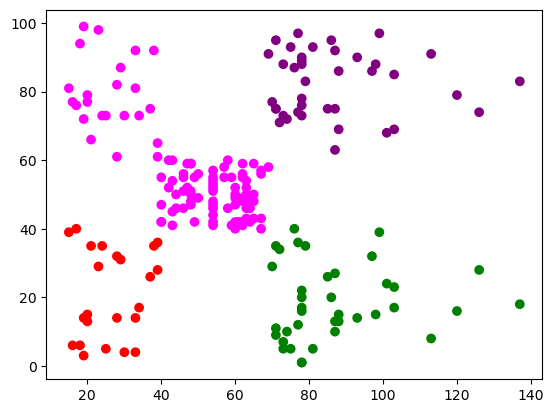

In [103]:
colormap=np.array(["Magenta","Green","purple","red"])
plt.scatter(data.Annual_Income_dollar,data.Spending_Score_1to100,c=colormap[data_kmeans.labels_])
plt.show()